In [1]:
from __future__ import print_function, division
from builtins import range, input

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from glob import glob

In [3]:
!ls


image.zip  sample_data


In [4]:
!unzip image.zip

Archive:  image.zip
  inflating: image/deer.jpg          
  inflating: image/proc.jpg          
  inflating: image/tie.jpg           


In [7]:
img_path = glob('image/*.jpg')


In [8]:
img_path

['image/tie.jpg', 'image/proc.jpg', 'image/deer.jpg']

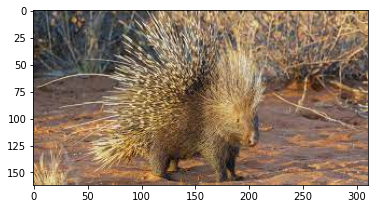

In [9]:
plt.imshow(image.load_img(np.random.choice(img_path)))
plt.show()

In [10]:
resnet = ResNet50(input_shape = (224,224,3), weights="imagenet", include_top = True)

102967424/102967424 [==============================] - 1s 0us/step


In [11]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [15]:
# activation_layer = resnet.get_layer('activation_49')
activation_layer = resnet.get_layer('conv5_block3_out')

In [16]:
activation_layer

In [18]:
dense_final = resnet.get_layer('predictions')
W = dense_final.get_weights()[0]

In [19]:
dense_final

In [20]:
W

array([[-0.01490746,  0.0113374 , -0.05073728, ..., -0.02179668,
        -0.07764222,  0.01018347],
       [-0.00294467,  0.00319835,  0.01953556, ...,  0.03623696,
         0.00350259, -0.03321117],
       [-0.01751374,  0.00807406,  0.00851311, ..., -0.03024036,
         0.05494978, -0.02511911],
       ...,
       [ 0.025289  ,  0.0630148 ,  0.02041481, ..., -0.00508354,
        -0.03542514, -0.01306196],
       [-0.00623157, -0.01624131, -0.01221174, ...,  0.01376359,
         0.04087579, -0.0185826 ],
       [-0.02668471,  0.0130982 , -0.01847764, ...,  0.06304929,
         0.02561448, -0.00693536]], dtype=float32)

In [21]:
model = Model(inputs = resnet.input, outputs = activation_layer.output)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [23]:
img = image.load_img(np.random.choice(img_path), target_size = (224,224))

In [24]:
x = preprocess_input(np.expand_dims(img, axis = 0))

In [25]:
fmaps = model.predict(x)[0]

1/1 [==============================] - 2s 2s/step


In [27]:
probs = resnet.predict(x)
class_names = decode_predictions(probs)[0]
print(class_names)
class_name = class_names[0][1]
pred = np.argmax(probs[0])

35363/35363 [==============================] - 0s 0us/step
[('n02422106', 'hartebeest', 0.53520215), ('n02423022', 'gazelle', 0.2236508), ('n02422699', 'impala', 0.16872165), ('n02115913', 'dhole', 0.044851), ('n02326432', 'hare', 0.011606707)]


In [28]:
W = W[:,pred]

In [29]:
W

array([-0.00622292,  0.00044941, -0.01631172, ...,  0.01971341,
        0.00051772, -0.00506022], dtype=float32)

In [30]:
cam = fmaps.dot(W)

In [31]:
cam = sp.ndimage.zoom(cam, (32,32), order = 1)

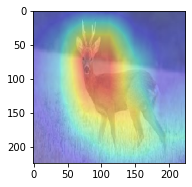

In [32]:
plt.subplot(1,2,1)# overlay the cam with the image
plt.imshow(img, alpha=0.5)
plt.imshow(cam, cmap = 'jet', alpha = 0.4)